## Sales Analysis

### Import Libraries

In [1]:
import pandas as pd
import os

#### Task 1: Merge 12 months of sales data into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Question 1: What was the best month for sales? How much was earned that month?

#### Drop NaNs

In [4]:
# Find NaN columns

nan_df = all_data[all_data.isna().any(axis=1)]

nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop NaNs

all_data = all_data.dropna(how='all')

#### Find 'Or' and remove it

In [6]:
temp_df = all_data[all_data['Order Date'].str[:2] == 'Or']

temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Removing rows with 'Or' as Month

all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

#### Add Month column

In [8]:
# Creating Month column 

all_data['Month'] = all_data['Order Date'].str[:2]

# Convert Month to number

all_data['Month'] = all_data['Month'].astype('int32')

all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Convert columns to correct type

In [9]:
all_data.dtypes

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Convert into int

all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Convert to float

all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

#### Create Totals column

In [10]:
all_data['Total'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### What was the best month for sales? How much was earned that month?

In [11]:
by_month = all_data.groupby(['Month']).sum()

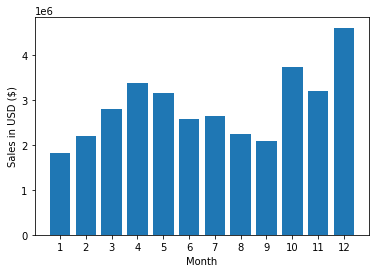

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, by_month['Total'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")
plt.show()

### What city had the highest number of sales?

In [13]:
all_data = pd.concat([all_data, all_data['Purchase Address'].str.split(', ', expand=True)], axis=1)

In [14]:
all_data = all_data.rename(columns={0: "Street", 1: "City", 2: "State"})

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA 90001
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA 94016
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA 94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA 94016


In [15]:
all_data['City'] = all_data['City'] + ' ' + all_data['State'].str[:2]

In [16]:
by_city = all_data.groupby(['City']).sum()
by_city

,Quantity Ordered,Price Each,Month,Total
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


In [ ]:
# alternate way

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

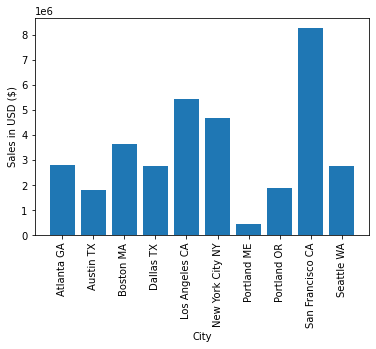

In [17]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, by_city['Total'])
plt.xticks(cities, rotation='vertical')
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.show()

### What time should we display advertisements to maximize the likelihood of purchases?

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [22]:
all_data['Order Hour'] = all_data['Order Date'].dt.hour

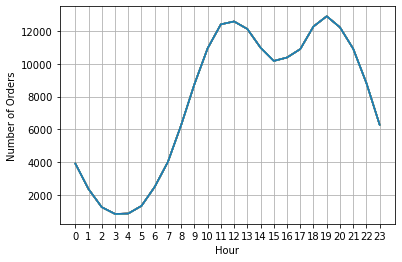

In [30]:
hours = [hour for hour, df in all_data.groupby('Order Hour')]

plt.plot(hours, all_data.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### What products are most often sold together?

In [35]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-35-7d8ccab84436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [37]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What product sold the most? Why do you think it did?

In [42]:
all_data.groupby(['Product']).sum().sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Month,Total,Order Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
iPhone,6849,4789400.00,47941,4794300.00,98657


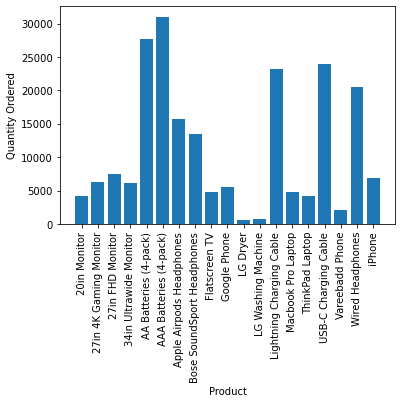

In [46]:
by_product = all_data.groupby('Product')
quantity_ordered = by_product.sum()['Quantity Ordered']

products = [product for product, df in by_product]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical')
plt.show()


<ipython-input-53-487386f3380c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


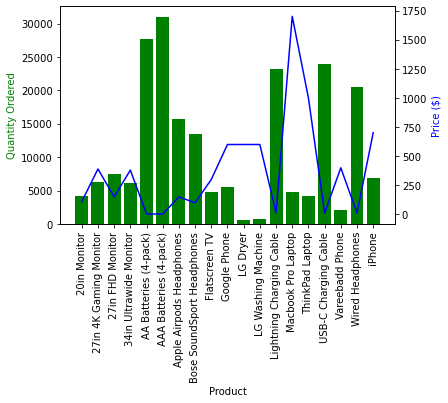

In [53]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()